# N-charge system

- The electric field for a single charge is given by:
\\( E = q * \frac{\hat{r}}{r} \\) 
- The electric Potential: \\( V  = q * \frac{1}{r} \\).
- In cartesian coordinate: \\( \frac{1}{r}  = \frac{1}{\sqrt{((x-x^{'})^{2} + (y - y^{'})^{2})}} \\).

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set()

#### Class Charge
Lets create a class ```Charge``` with function ```line``` to calculate the distance between source and field point and function ```V_point_charge``` to calculate the electric potential ata  fileld point ```x,y``` due to source poin at ```pos```.

In [42]:
class Charge:
    
    '''Data incapsulation'''
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
        
        
    def line(self, x,y):
        '''create a vector from charge to observation point'''
        self.vector = [x-self.pos[0],y-self.pos[1]]
        '''norm of the vector'''
        self.norm = np.sqrt((self.vector[0])**2+(self.vector[1])**2)
        
    
    def V_point_charge(self, x, y):
        '''recall length'''
        self.line(x,y)
        '''Make sure to exclude source itself'''
        if self.norm > 0:
            self.V = self.q/self.norm
            
            '''if length is zero, set V equal to 0'''
        elif self.norm == 0:
            self.V = 0
            
        return self.V

#### Example :  

Lets use charge ```q = 100``` at posiotion ```x =1``` and ```y =1``` to find electric potential at different points in 2D

In [14]:
C = Charge(100, [1,1])

In [15]:
for x in range(3):
    for y in range(3):
        print(x,y, "|", C.V_point_charge(x, y))

0 0 | 70.71067811865474
0 1 | 100.0
0 2 | 70.71067811865474
1 0 | 100.0
1 1 | 0
1 2 | 100.0
2 0 | 70.71067811865474
2 1 | 100.0
2 2 | 70.71067811865474


#### Total Electric potential
Total electric potential at a point ```x,y``` is the sum of contribution of all charges defined in class ```Charge```.

In [43]:
def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = C.V_point_charge(x, y)
        V  = V+Vp
    return V

- Example: Lets use collection of charges to find a electric potential at point x = 4, y =4

In [44]:
sample_charges = [Charge(q = 20, pos = [23,34]),
                  Charge(q = 25, pos = [13,48]),
                  Charge(q = 40, pos = [3,14]),
                  Charge(q = 80, pos = [88,60])]


V_total(x=4, y=4, charges = sample_charges)

5.892446541150622

###  Lattice of charges
Now, we are going to implement ```Charge``` class to define charge distribution and calculate electric potential at several places.

 - To create a lattice of charges.

In [18]:
'''first charge to be at x=1,y=1'''
q = 100

'''Dictionary to collect charges, x and y xoordinates'''
Qd = []

'''List to collect Charge objects'''
charges = []


'''use for loops to construct collection of charges objects'''
for i in range(5):
    for j in range(5):
        
        '''Collecting charges and their coordinates'''
        Qd.append({"q": q, "x": i*20, "y":j*20})
        
        
        '''charge objects are being collected'''
        charges.append(Charge(q , [20*i, 20*j]))
        
        '''change the sign of charge alternatly'''
        q = -q
  

- To visualize lattice of charges

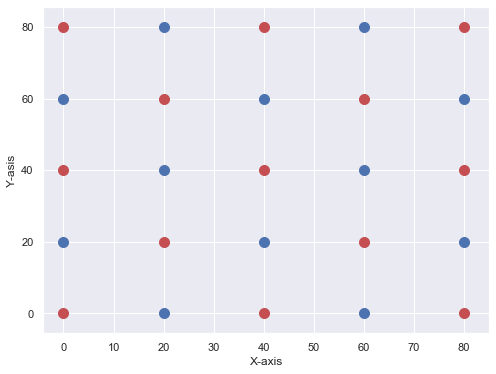

In [40]:
'''Plot the lattice of charges'''

plt.figure(figsize = [8,6])

for item in Qd:
    
    '''Sctaeer as red dot if charge is positive'''
    if item['q']> 0:
        plt.scatter(item['x'], item['y'], c = 'r',s =100)
        
        
        '''Scatter as blue dot if charge is negative'''
    else:
        plt.scatter(item['x'], item['y'], c = 'b',s =100)
        
plt.xlabel("X-axis")  
plt.ylabel("Y-asis")
plt.show()

- To find Electric Potential at several points due to lattice of charges

In [48]:
'''Create X and Y coordinate'''
X = np.arange(-10,110,2)
Y = np.arange(-10,110,2)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(X))] for j in range(len(Y))]

'''Calculate Electric potential at each x,y coordinate'''
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        v = V_total(x, y, charges)
        V[i][j] = v       

In [49]:
VV = np.array(V)

- To plot Electric potential

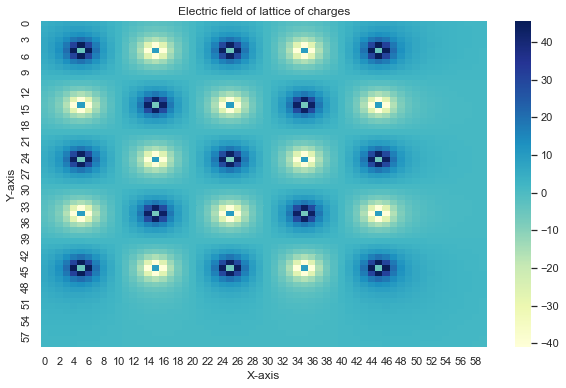

In [51]:
plt.figure(figsize = [10,6])
sns.heatmap(VV,annot=False,cmap='YlGnBu')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Electric field of lattice of charges")
plt.show()